In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\hp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
hotels = pd.read_excel("D:/STUDIES/Data Visualization/Data/HotelCustomersDataset.xlsx")

hotels.head()

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
top5_countries = hotels.query("Nationality in ['GBR', 'PRT', 'FRA', 'DEU', 'ESP']")

In [5]:
top5_countries

,ID,Nationality,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,45,371.0,105.3,1,0,3,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,61,280.0,53.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,93,240.0,60.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83579,83580,PRT,36.0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83580,83581,DEU,48.0,0,20,176.0,147.0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
83581,83582,DEU,48.0,0,0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
83582,83583,FRA,49.0,0,91,143.0,2.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [16]:
top5_countries_pivot = top5_countries.pivot_table(index="Nationality", columns="MarketSegment", values={"LodgingRevenue":"mean"})

<Axes: xlabel='MarketSegment', ylabel='Nationality'>

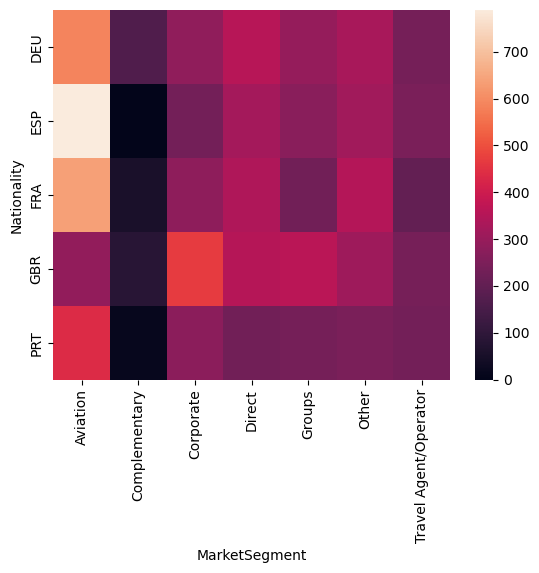

In [20]:
sns.heatmap(
    top5_countries_pivot.droplevel(0, axis=1),
)

<Axes: xlabel='MarketSegment', ylabel='MarketSegment'>

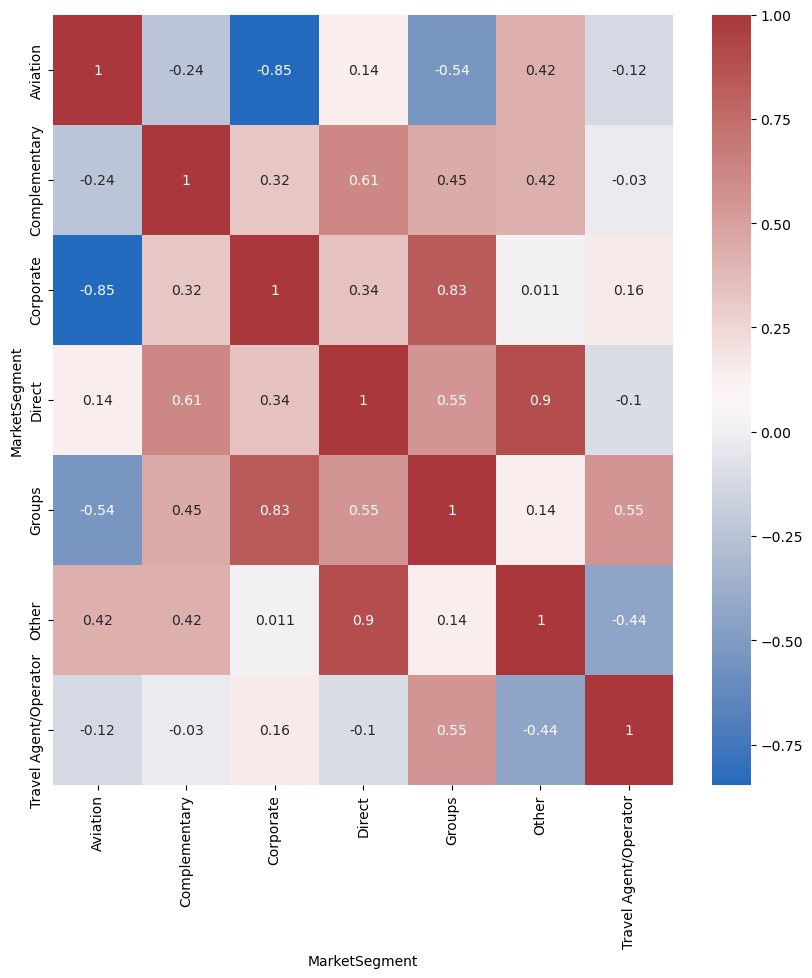

In [35]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(
    top5_countries_pivot.iloc[:,:10].corr().droplevel(0, axis=1).droplevel(0, axis=0),
    annot=True,
    cmap="vlag"
)